In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [29]:
import librosa.display

In [30]:

music_data = pd.read_csv('file.csv') 
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [31]:

music_data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

Blue


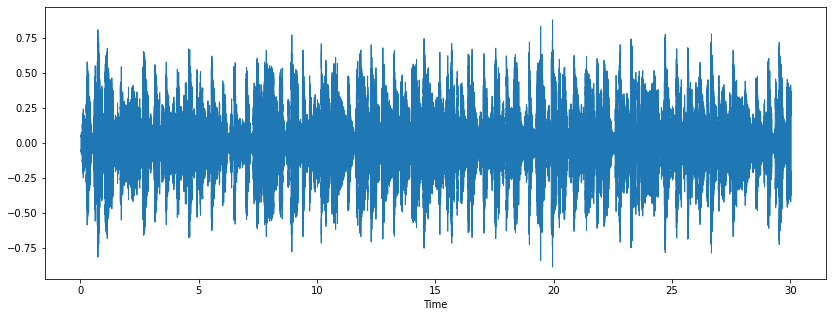

In [32]:
path = 'blues.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 

print("Blue")


Country


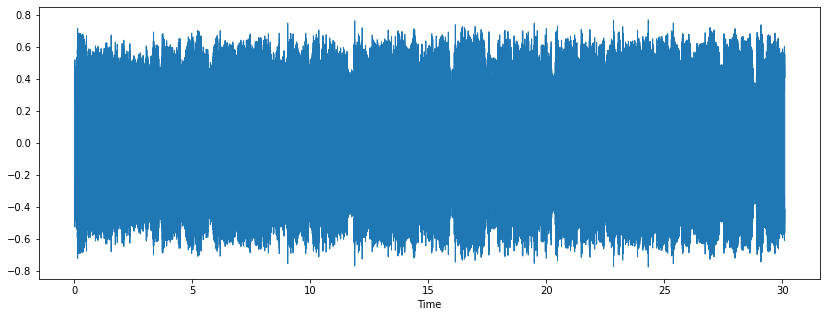

In [33]:
path = 'country.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 

print("Country")


Pop


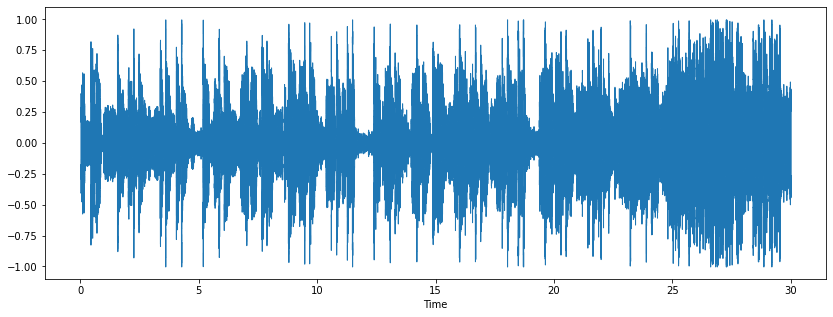

In [34]:
path = 'pop.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 

print("Pop")

hiphop


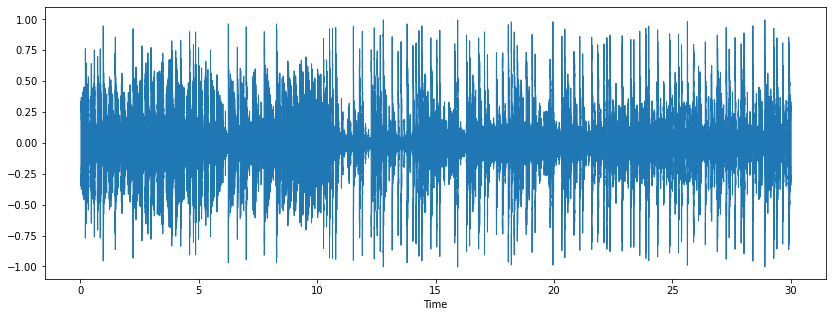

In [35]:
path = 'hiphop.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 

print("hiphop")

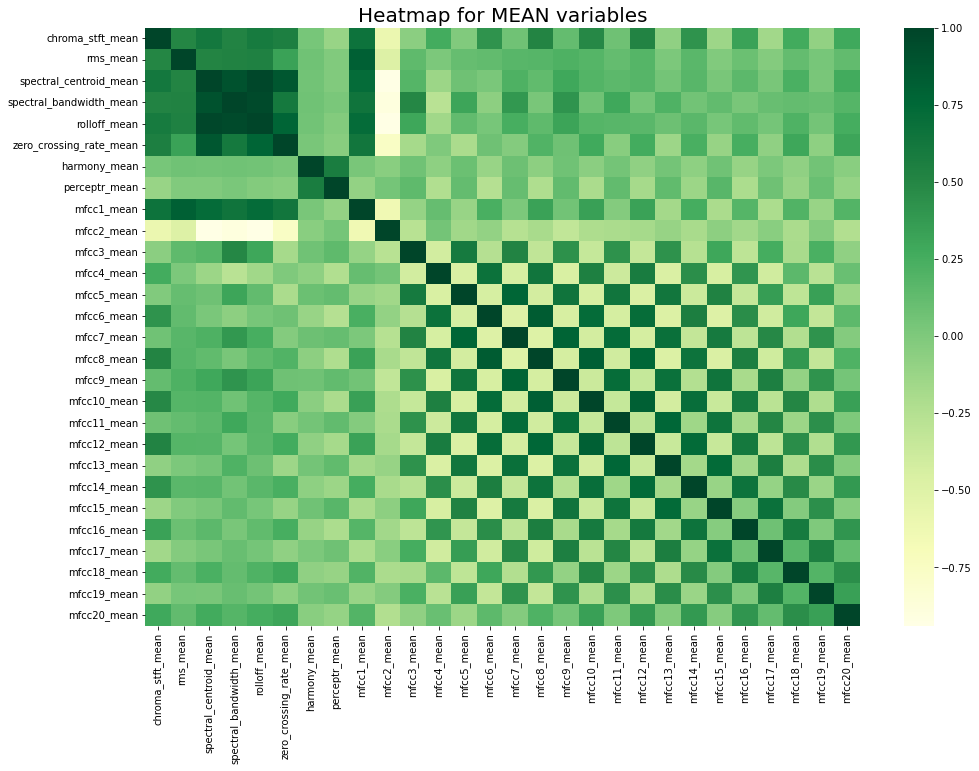

In [36]:

import numpy as np 
import seaborn as sns 
  
# Computing the Correlation Matrix 
spike_cols = [col for col in music_data.columns if 'mean' in col] 
  
# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(16, 11)); 
  
# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn') 
  
plt.title('Heatmap for MEAN variables', fontsize = 20) 
plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10);

In [37]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
music_data['label'] = label_encoder.fit_transform(music_data['label'])


In [38]:
X = music_data.drop(['label','filename'],axis=1) 
y = music_data['label']


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [70]:
cols = X.columns 
minmax = preprocessing.MinMaxScaler() 
np_scaled = minmax.fit_transform(X) 

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)


In [71]:
X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.113487,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.113487,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.113487,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.113487,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.113487,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836


In [56]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
													test_size=0.3, 
													random_state=55) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((700, 58), (300, 58), (700,), (300,))

In [58]:
y_train.head()

876    8
447    4
601    6
553    5
816    8
Name: label, dtype: int32

In [57]:
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier   
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=55) 
rf.fit(X_train, y_train) 
preds = rf.predict(X_test) 
print(rf.__class__.__name__,accuracy_score(y_test, preds))

RandomForestClassifier 0.81


In [44]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train) 
preds = knn.predict(X_test) 
print(knn.__class__.__name__,accuracy_score(y_test, preds))

KNeighborsClassifier 0.47333333333333333


In [45]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(random_state = 3)
dtc.fit(X_train, y_train) 
preds = dtc.predict(X_test) 
print(dtc.__class__.__name__,accuracy_score(y_test, preds))

DecisionTreeClassifier 0.62


In [59]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 
xgb.fit(X_train, y_train) 
preds = xgb.predict(X_test) 
print(xgb.__class__.__name__,accuracy_score(y_test, preds))

XGBClassifier 0.7733333333333333


In [72]:
import joblib

joblib.dump(xgb, "clf.pkl")

['clf.pkl']

In [65]:
import librosa
import numpy as np

def extract_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Extract features
    features = []

    # Length of the audio
    features.append(librosa.get_duration(y=y, sr=sr))

    # Chroma feature
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    features.append(np.mean(chroma_stft))
    features.append(np.var(chroma_stft))

    # RMS (Root Mean Square) feature
    rms = librosa.feature.rms(y=y)
    features.append(np.mean(rms))
    features.append(np.var(rms))

    # Spectral centroid feature
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features.append(np.mean(spectral_centroid))
    features.append(np.var(spectral_centroid))

    # Spectral bandwidth feature
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    features.append(np.mean(spectral_bandwidth))
    features.append(np.var(spectral_bandwidth))

    # Spectral rolloff feature
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features.append(np.mean(rolloff))
    features.append(np.var(rolloff))

    # Zero crossing rate feature
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    features.append(np.mean(zero_crossing_rate))
    features.append(np.var(zero_crossing_rate))

    # Harmony feature
    harmony = librosa.effects.harmonic(y=y)
    features.append(np.mean(harmony))
    features.append(np.var(harmony))

    # Perceptual feature
    perceptr = librosa.feature.spectral_contrast(y=y, sr=sr)
    features.append(np.mean(perceptr))
    features.append(np.var(perceptr))

    # Tempo feature
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features.append(tempo)

    # MFCCs (Mel-frequency cepstral coefficients) features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(1, 21):  # 20 MFCC coefficients
        features.append(np.mean(mfccs[i-1]))
        features.append(np.var(mfccs[i-1]))

    return np.array(features)
scaler=StandardScaler()
# Example usage:
audio_path = 'country.00000.wav'
audio_features = extract_features(audio_path)
# print(audio_features)
audio_features=audio_features.reshape(1,-1)

knn.predict(audio_features)


e:\Python-anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([8])

In [49]:

print(xgb.predict(audio_features))


[4]
